<a href="https://colab.research.google.com/github/dedemasutti/Machine-Learning/blob/main/Crypto_Clustering_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando os dados e definindo indice
data = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

       price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%

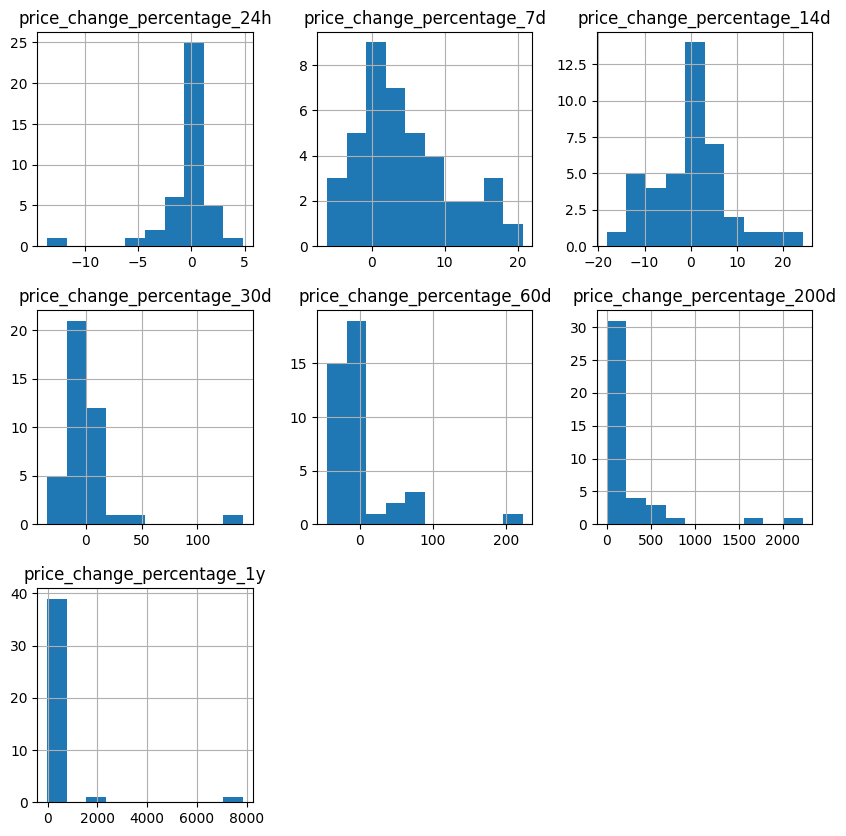

In [3]:
# Get summary statistics and plot the data

print(data.describe())
data.hist(figsize=(10, 10))
plt.show()

In [4]:
# Prepara os dados

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data_df = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

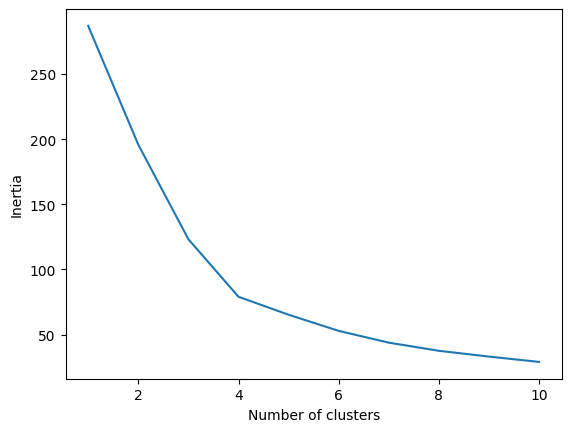

In [5]:
# Encontra o melhor valor para k usando os dados originais escalados

inertia_values = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_data_df)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


The best value for k is 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


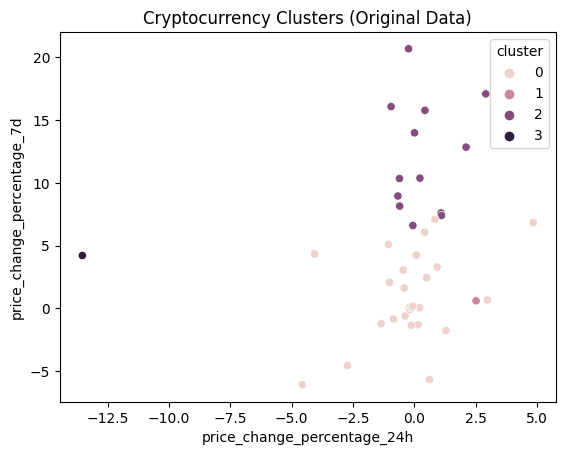

In [6]:
# Melhor valor para k
best_k = 4
print("The best value for k is", best_k)


# Agrupa as criptomoedas com K-means usando os dados originais escalados
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data_df)

data["cluster"] = cluster_labels
data_with_clusters = data.copy()

# Plotando  clusters usando seaborn
sns.scatterplot(data=data_with_clusters, x="price_change_percentage_24h", y="price_change_percentage_7d", hue="cluster")
plt.title("Cryptocurrency Clusters (Original Data)")
plt.show()

Explained variance of each principal component: [0.3719856  0.34700813 0.17603793]
Total explained variance: 0.895031657030984


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

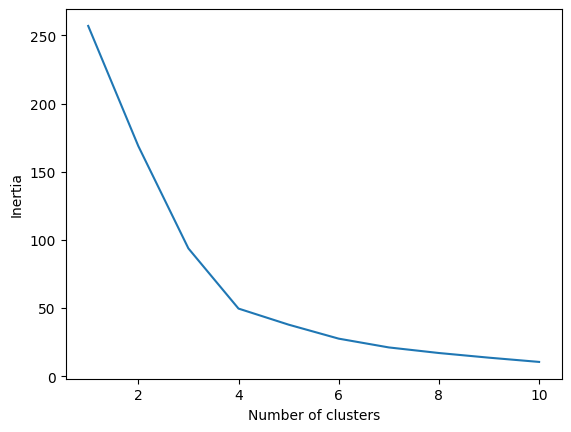

In [7]:
# Otimiza os clusters com análise de componentes principais
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data_df)
pca_data_df = pd.DataFrame(pca_data, index=data.index)


# What is the total explained variance of the three principal components?
explained_variance = pca.explained_variance_ratio_
print("Explained variance of each principal component:", explained_variance)
print("Total explained variance:", sum(explained_variance))

# Find the best value for k using the PCA data
inertia_values = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(pca_data_df)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [8]:
# What is the best value for k when using PCA data?
best_k_pca = 3
print("The best value for k using PCA data is", best_k_pca)

# Does it differ from the best k value found using the original data?
if best_k != best_k_pca:
    print("Yes, the best value for k differs when using PCA data")
else:
    print("No, the best value for k is the same when using PCA data")

# Cluster the cryptocurrencies with K-means using the PCA data
kmeans = KMeans(n_clusters=best_k_pca, random_state=42)
cluster_labels_pca = kmeans.fit_predict(pca_data_df)

data_with_clusters["cluster_pca"] = cluster_labels_pca



The best value for k using PCA data is 3
Yes, the best value for k differs when using PCA data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
